In [ ]:
# Add Deeplearning course strategy stuff
# Add unit testing from Google course

# Machine Learning Recipe

Explain the assignment

In [ ]:
import os
os.getcwd()

In [3]:
from IPython.display import Image 

## 1. Loading the libraries and dataset

### THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import locale
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.estimators import run_config
import time

### THE DATA

In [ ]:
data =  pd.read_csv('*.csv')

In [ ]:
data.head()

## 2. Getting to know the data

Things to notice about our new data:
* Number of rows and columns
* Number of continuous variables and their stats
* Number of categorical variables and number of unique values in each
* Missing values
* Correlation between variables

#### Number of rows and columns

In [ ]:
nor = locale.format('%d',len(data), True)
print('The data set has %s records.' %(nor))

In [ ]:
noc = len(data.columns)
print('The data set has %s columns.' %(noc))

In [ ]:
data.dtypes

#### Number of continuous variables and their stats

In [ ]:
num_cols = data.select_dtypes('...').columns

In [ ]:
print('There are %d numeric columns: '%(len(num_cols)), '\n', list(num_cols))

In [ ]:
data.describe()

In [ ]:
plot_num = 0
for num_col in num_cols:
    plot_num += 1
    plt.figure(plot_num)
    data[num_col].plot(kind='hist', legend=True)
    plot_num += 1
    plt.figure(plot_num)
    data[num_col].plot(kind='box')

#### Number of categorical variables and number of unique values in each

In [ ]:
cat_cols = data.select_dtypes('...').columns

In [ ]:
cat_cols

In [ ]:
plot_num = 0
for cat_col in cat_cols:
    plot_num += 1
    plt.figure(cat_col, figsize=(15,6))
    data.groupby(by=cat_col).count()['age'].plot(kind='bar')

#### Missing values

In [ ]:
null_data = data[data.isnull().any(axis=1)]

In [ ]:
null_data

#### Correlation between variables

In [ ]:
cor_mat = pd.DataFrame(data.corr())

In [ ]:
cor_mat

In [ ]:
plt.figure(figsize=(15,6))
plt.yticks(np.arange(0.5, len(cor_mat.index), 1), cor_mat.index, )
plt.xticks(np.arange(0.5, len(cor_mat.columns), 1), cor_mat.columns)
plt.pcolor(cor_mat)
plt.colorbar()

In [ ]:
data.plot('...', '...', kind='scatter')

In [ ]:
cross = pd.crosstab(data['...'],
                    data['...'],
                    normalize='columns')

In [ ]:
cross

In [ ]:
cross.plot.bar(stacked=True, figsize=(15, 6))

In [ ]:
cross.plot.pie(subplots=True, figsize=(20, 30), layout=(3, 2), legend=False, startangle=0, labeldistance=1.05)

In [ ]:
data.groupby(['...', '...']).count()

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(cross, annot=True, fmt=".3f", cmap='coolwarm')

In [ ]:
plot_num = 0
cat_cols_list = list(cat_cols)
cat_cols_list.remove('...')
cat_cols_list.remove('...')
cat_cols_list.remove('...')
for cat_col in cat_cols_list:
    cross = pd.crosstab(data['...'],
                        data[cat_col],
                        normalize='columns') 
    plot_num += 1
    plt.figure(cat_col, figsize=(15,6))
    sns.heatmap(cross, annot=True, fmt=".3f", cmap='Blues')

## 3. Prepping the data

### LABEL PREP

In [ ]:
data['label'] = data['...'].apply(lambda x: 1 if ... else 0)

In [ ]:
y_val = data['label']

### FEATURE COLUMN IDENTIFICATION

In [ ]:
data.dtypes

In [ ]:
cat_cols_list = list(cat_cols)
cat_cols_list.remove('...')
cat_cols_list

In [ ]:
num_cols_list = list(num_cols)
num_cols_list.remove('label')
num_cols_list

In [ ]:
x_data_cols = []
for f in cat_cols_list:
    x_data_cols.append(f)
for f in num_cols_list:
    x_data_cols.append(f)

In [ ]:
x_data = data[x_data_cols]

### FEATURE ENGINEERING PRE-SPLIT

#### <font color="blue"> sklearn </font>

In [ ]:
data_dummies = census
data_dummies = data_dummies.drop('...', axis=1)
data_dummies = data_dummies.drop('...', axis=1)

x_data = pd.get_dummies(data_dummies)

### TRAINING, DEV AND TEST SPLIT

We should split twice to have training, dev and test set.  Ensure your dev and test set come from the same distribution.

Remember the <b> purpose of the dev set </b> is to iterate between different ideas to see what works best, by playing for exmple with the different hyperparameters.
The <b> purpose of the test set </b> is to help you value your final model.

When you do not have a lot of data (10s of thousands), you can consider a 60%, 20%, 20% split.  But if you have a large data set (million+), you may want to reduce the percentages of dev and test significantly and a 98%, 1%, 1% split might be sufficient. But do ensure you set your test set to be big enough to give high confidence in the overall performance of your system.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_val,
                                                    test_size=0.2, 
                                                    random_state=101)

X_train, X_dev, y_train, y_dev = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2, 
                                                  random_state=101)

In [ ]:
print(round(100.*len(X_train)/len(data),0))
print(round(100.*len(X_dev)/len(data),0))
print(round(100.*len(X_test)/len(data),0))

### FEATURE ENGINEERING POST-SPLIT

#### <font color="orange"> tensorflow </font>

** Catergorical Features **

In [ ]:
cat_cols_list

In [ ]:
cat_feat_list = []
cat_feat_dict = {}

In [ ]:
for cat_col in cat_cols_list:
    voc_list = census[cat_col].value_counts().keys()
    cat_feat_dict[cat_col] = voc_list
    len_voc_list = len(voc_list)
    name = str(cat_col) + '_hash' 
    name = tf.feature_column.categorical_column_with_vocabulary_list(cat_col, voc_list)
    cat_feat_list.append(name)

** Continuous Features**

In [ ]:
num_feat_list = []
for nf in num_cols_list:
    name = str(nf) + '_f'
    name = tf.feature_column.numeric_column(nf)
    num_feat_list.append(name)

** All Features **

In [ ]:
feat_cols = cat_feat_list + num_feat_list

## 4. Training the first model

Build your first system quickly, then iterate.  This first attempt could be quick and dirty, unless you have extensive prior expertise with the problem or there is a large body of academic literature available related to the problem, for example face recognition. Think about whether transfer learning is an option.

You may want to first try out a vanilla Linear Regression or Logistic regression, before attempting a NN, to get a better feel for the data.

Use Bias/Variance analysis and error analysis to prioritize next steps.

#### <font color="blue"> sklearn </font>

In [ ]:
sk_LogisticRegression_model = LogisticRegression()

In [ ]:
start = time.time()
sk_LogisticRegression_model.fit(X_train, y_train)
end = time.time()
duration = end - start

#### <font color="orange"> tensorflow </color>

In [ ]:
batch_size = 128
num_epochs = 1000
steps = len(X_train)/batch_size*num_epochs
log_step_count_steps = steps/10

# What about different optimization algos, such as Adam...


input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                 batch_size=batch_size,
                                                 num_epochs=num_epochs,
                                                 shuffle=True)

In [ ]:
tf.logging.set_verbosity(tf.logging.INFO)
tf.estimator.RunConfig.log_step_count_steps = log_step_count_steps
tf.logging.set_verbosity(tf.logging.INFO)
tf.estimator.RunConfig.log_step_count_steps = log_step_count_steps
print('''With a batch size of %d, 
a number of epochs of %d 
and a training set of size %d, 
the number of steps is: %d. 
Every %d step will be logged.''' %(batch_size,
                                   num_epochs,
                                   len(X_train),
                                   steps,
                                   log_step_count_steps))

In [16]:
iter_num = str('010') # update to 011, 012, if you run this block again and want to keep each run in a separate folder
model_dir = '%s_f_LinearClassifier_model' %(iter_num)
os.mkdir(model_dir)

In [11]:
model_dir

'00_f_LinearClassifier_model'

In [ ]:
tf_LinearClassifier_model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                                          n_classes=2,
                                                          model_dir=model_dir)

In [ ]:
start = time.time()
tf_LinearClassifier_model.train(input_fn=input_func, steps=steps)
end = time.time()
duration = end - start

### Save the model

#### <font color="blue"> sklearn </font>

In [ ]:
joblib.dump(sk_LogisticRegression_model, 'path+name.pkl')

#### <font color="orange"> tensorflow </color>

Automatically in model_dir

### EVALUATING TRAINING AND DEV

Determine what is the single value satisficing evaluation metric you are going to use to compare models.  Are there any optimizing metrices, for example time to complete training?

Determine if you have:
1. High avoidable bias by looking at training data performance.  We call Bayes error the smallest error rate which can possible be obtained. For some problems such as computer vision, human level error can be used as an approximation of Bayes error, since humans are pretty good at recognizing objects in pictures.  High avoidable bias means that the error rate is much higher than Bayes error.
    
    If YES, try the following:
    * Train longer
    * Use better optimization algo (for example Adam)
    * Use different hyperparameters
    * Try a different ML model
    * In case of NN, create a bigger network


2. High variance by looking at dev data performance.  High variance means that the error rate on the dev set is much higher than on the training set.  In other words your model has most likely been overfitted to the training data and does not generalize well.
    
    If YES, try the following:
    * Get more data and start over
    * Try regularization
    * Use different hyperparameters
    * Try a different ML model

### Load the model

#### <font color="blue"> sklearn </font>

In [ ]:
sk_LogisticRegression_model = joblib.load('path+name.pkl')

#### <font color="orange"> tensorflow </color>

In [ ]:
config = tf.estimator.RunConfig(model_dir=model_dir)
tf_LinearClassifier_model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                                          n_classes=2,
                                                          config=config,
                                                          model_dir=model_dir)

#### <font color="blue"> sklearn </font>

** Evaluate **

In [ ]:
sk_LogisticRegression_model.score(X_train, y_train)
sk_LogisticRegression_model.score(X_dev, y_dev)

** Predict **

In [ ]:
train_predictions = sk_LogisticRegression_model.predict(X_train)
dev_predictions = sk_LogisticRegression_model.predict(X_dev)

** Report **

In [ ]:
print(classification_report(y_train, train_predictions)
print(classification_report(y_dev, dev_predictions)

In [ ]:
print(confusion_matrix(y_train, train_predictions))
print(confusion_matrix(y_dev, dev_predictions))

** Error **

In [ ]:
num_cols_x = [nc+ '_x' for nc in num_cols_list]
cols = cat_cols_list + num_cols_x

In [ ]:
X_train_eval = data.merge(X_train, how='inner', left_on=data.index, right_on=X_train.index)[cols]
X_train_eval = X_train_eval.assign(label=y_train.values)
X_train_eval = X_train_eval.assign(prediction=pd.Series(train_predictions).values)
X_train_eval[((X_train_eval['label'] == 0) & (X_train_eval['prediction'] == 1) |
             ((X_train_eval['label'] == 1) & (X_train_eval['prediction'] == 0)))]

In [ ]:
X_dev_eval = data.merge(X_dev, how='inner', left_on=data.index, right_on=X_dev.index)[cols]
X_dev_eval = X_dev_eval.assign(label=y_dev.values)
X_dev_eval = X_dev_eval.assign(prediction=pd.Series(dev_predictions).values)
X_dev_eval[((X_dev_eval['label'] == 0) & (X_dev_eval['prediction'] == 1) |
           ((X_dev_eval['label'] == 1) & (X_dev_eval['prediction'] == 0)))]

#### <font color="orange"> tensorflow </font>

** Evaluate **

In [ ]:
train_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                            y=y_train,
                                                            batch_size=10,
                                                            num_epochs=1,
                                                            shuffle=False)
dev_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_dev,
                                                          y=y_dev,
                                                          batch_size=10,
                                                          num_epochs=1,
                                                          shuffle=False)

In [ ]:
train_results = tf_LinearClassifier_model.evaluate(train_eval_input_func)
dev_results = tf_LinearClassifier_model.evaluate(dev_eval_input_func)

** Predict **

In [ ]:
train_pred = tf_LinearClassifier_model.predict(train_eval_input_func)
train_predictions = [pred['class_ids'][0] 
                     for pred 
                     in train_pred]
train_pred = tf_LinearClassifier_model.predict(train_eval_input_func)
train_probabilities = [pred['probabilities'][0:2] 
                       for pred 
                       in train_pred]
dev_pred = tf_LinearClassifier_model.predict(dev_eval_input_func)
dev_predictions = [pred['class_ids'][0] 
                   for pred 
                   in dev_pred]
dev_pred = tf_LinearClassifier_model.predict(dev_eval_input_func)
dev_probabilities = [pred['probabilities'][0:2] 
                     for pred 
                     in dev_pred]

** Report **

In [ ]:
print(classification_report(y_train, train_predictions))
print(classification_report(y_dev, dev_predictions))

In [ ]:
train_confusion_mat = confusion_matrix(y_train, train_predictions)
dev_confusion_mat = confusion_matrix(y_dev, dev_predictions)
print(train_confusion_mat)
print(dev_confusion_mat)

In [ ]:
train_accuracy = (np.sum(train_confusion_mat * np.array([[1, 0], [0, 1]]) 
                         / np.sum(train_confusion_mat)))
print(train_accuracy)
dev_accuracy = (np.sum(dev_confusion_mat * np.array([[1, 0], [0, 1]]) 
                         / np.sum(dev_confusion_mat)))
print(dev_accuracy)

In [ ]:
model_stats = []


In [ ]:
this_model_stats = {'model_dir': model_dir,
                    'batch_size': batch_size,
                    'num_epochs': num_epochs,
                    'steps': steps,
                    'duration': duration,
                    'train_accuracy': train_accuracy,
                    'dev_accuracy': dev_accuracy}

In [ ]:
model_stats.append(this_model_stats)
model_stats

In [ ]:
model_stats_df = pd.DataFrame(model_stats)

In [ ]:
model_stats_df.to_csv('model_stats.csv')

** Errors **

In [ ]:
X_train_eval = X_train
X_train_eval = X_train_eval.assign(label=y_train.values)
X_train_eval = X_train_eval.assign(prediction=pd.Series(train_predictions).values)
X_train_eval[((X_train_eval['label'] == 0) & (X_train_eval['prediction'] == 1) |
             ((X_train_eval['label'] == 1) & (X_train_eval['prediction'] == 0)))]

In [ ]:
X_dev_eval = X_dev
X_dev_eval = X_dev_eval.assign(label=y_dev.values)
X_dev_eval = X_dev_eval.assign(prediction=pd.Series(dev_predictions).values)
X_dev_eval[((X_dev_eval['label'] == 0) & (X_dev_eval['prediction'] == 1) |
           ((X_dev_eval['label'] == 1) & (X_dev_eval['prediction'] == 0)))]

** Error Analysis **
* Get 100 mislabeled dev set examples and categorize the mistakes.
* Determine the mitigation which categories of errors is worth spending time on

For example, in a cat classification application:
If your dev set error is 10%
And 5% of the errors is due to dogs being classified as cats (aka the dag problem), we can at most hope to reduce the error rate to 9.5% by solving the dog problem.  If on the other hand the dog problem accounts for 50% of your error sample, we may be able to reduce the error rate from 10% to 5%.

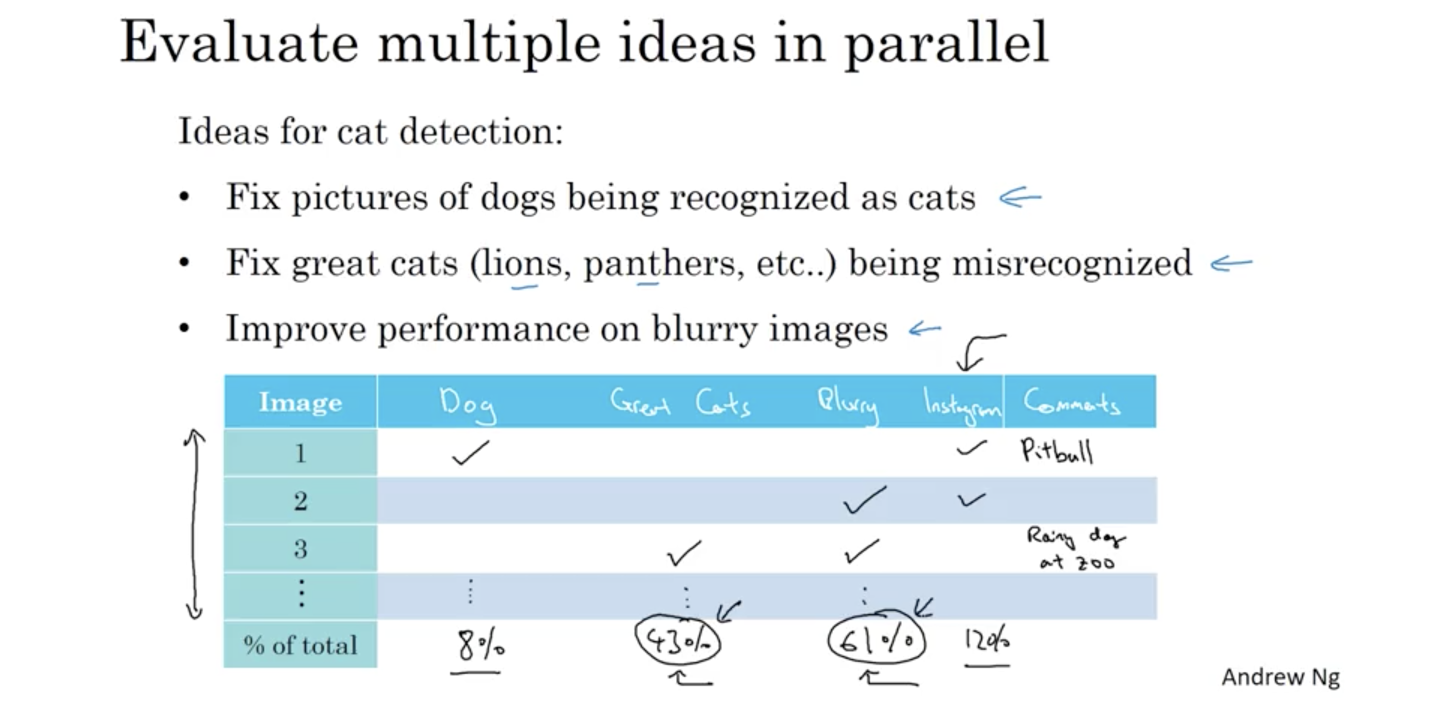

In [4]:
Image(filename='ErrorAnalysis.png')

## 5. Iterate in search for the best results

In [ ]:
batch_size_iter = [64, 256]
num_epochs_iter = [100, 200]

In [ ]:
num = 19
for bs in batch_size_iter:
    batch_size = bs
    for ne in num_epochs_iter:
        num_epochs = ne
        steps = len(X_train)/batch_size*num_epochs
        log_step_count_steps = steps/10
        tf.estimator.RunConfig.log_step_count_steps = log_step_count_steps
        print('''**** With a batch size of %d, a number of epochs of %d 
and a training set of size %d, the number of steps is: %d. 
Every %d step will be logged. ****''' %(batch_size,
                                   num_epochs,
                                   len(X_train),
                                   steps,
                                   log_step_count_steps))
        input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                         y=y_train,
                                                         batch_size=batch_size,
                                                         num_epochs=num_epochs,
                                                         shuffle=True)
        num += 1
        iter_num = str('0' + str(num))
        model_dir = '%s_tf_LinearClassifier_model' %(iter_num)
        tf_LinearClassifier_model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                                                  n_classes=2,
                                                                  model_dir=model_dir)
        start = time.time()
        tf_LinearClassifier_model.train(input_fn=input_func,steps=steps)
        end = time.time()
        duration = end - start
        train_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                                    y=y_train,
                                                                    batch_size=10,
                                                                    num_epochs=1,
                                                                    shuffle=False)
        dev_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_dev,
                                                                  y=y_dev,
                                                                  batch_size=10,
                                                                  num_epochs=1,
                                                                  shuffle=False)
        train_pred = tf_LinearClassifier_model.predict(train_eval_input_func)
        train_predictions = [pred['class_ids'][0] for pred in train_pred]
        dev_pred = tf_LinearClassifier_model.predict(dev_eval_input_func)
        dev_predictions = [pred['class_ids'][0] for pred in dev_pred]
        train_confusion_mat = confusion_matrix(y_train, train_predictions)
        dev_confusion_mat = confusion_matrix(y_dev, dev_predictions)
        train_accuracy = (np.sum(train_confusion_mat * np.array([[1, 0], [0, 1]]) 
                          / np.sum(train_confusion_mat)))
        dev_accuracy = (np.sum(dev_confusion_mat * np.array([[1, 0], [0, 1]]) 
                        / np.sum(dev_confusion_mat)))
        this_model_stats = {'model_dir': model_dir,
                            'batch_size': batch_size,
                            'num_epochs': num_epochs,
                            'steps': steps,
                            'duration': duration,
                            'train_accuracy': train_accuracy,
                            'dev_accuracy': dev_accuracy}
        model_stats.append(this_model_stats)
        model_stats_df = pd.DataFrame(model_stats)
        model_stats_df.to_csv('model_stats.csv')

### Choose best model and load it

In [ ]:
model_stats_df

In [ ]:
model_dir = '023_tf_LinearClassifier_model'
config = tf.estimator.RunConfig(model_dir=model_dir)
tf_LinearClassifier_model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                                          n_classes=2,
                                                          config=config,
                                                          model_dir=model_dir)

## 6. Evaluating the model on test set

### Evaluation Test

What we really mean here is dev set, since we are going to use to try out different ideas.

#### <font color="blue"> sklearn </font>

** Evaluate **

In [ ]:
sk_LogisticRegression_model.score(X_test, y_test)

** Predict **

In [ ]:
test_predictions = sk_LogisticRegression_model.predict(X_test)

** Report **

In [ ]:
print(classification_report(y_test, test_predictions))

In [ ]:
print(confusion_matrix(y_test, test_predictions))

** Error **

In [ ]:
X_test_eval = data.merge(X_test, how='inner', left_on=data.index, right_on=X_test.index)[cols]
X_test_eval = X_test_eval.assign(label=y_test.values)
X_test_eval = X_test_eval.assign(prediction=pd.Series(test_predictions).values)
X_test_eval[((X_test_eval['label'] == 0) & (X_test_eval['prediction'] == 1) |
            ((X_test_eval['label'] == 1) & (X_test_eval['prediction'] == 0)))]

#### <font color="orange"> tensorflow </font>

** Evaluate **

In [ ]:
test_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                           y=y_test,
                                                           batch_size=10,
                                                           num_epochs=1,
                                                           shuffle=False)

In [ ]:
test_results = tf_LinearClassifier_model.evaluate(test_eval_input_func)

** Predict **

In [ ]:
test_pred = tf_LinearClassifier_model.predict(test_eval_input_func)
test_predictions = [pred['class_ids'][0] 
                    for pred 
                    in test_pred]
test_pred = tf_LinearClassifier_model.predict(test_eval_input_func)
test_probabilities = [pred['probabilities'][0:2] 
                       for pred 
                       in test_pred]

** Report **

In [ ]:
print(classification_report(y_train, training_predictions))

In [ ]:
print(confusion_matrix(y_train, training_predictions))

** Errors **

In [ ]:
X_test_eval = X_test
X_test_eval = X_test_eval.assign(label=y_test.values)
X_test_eval = X_test_eval.assign(prediction_TFLC=pd.Series(final_test_preds).values)
X_test_eval[((X_test_eval['label'] == 0) & (X_test_eval['prediction_TFLC'] == 1) |
            ((X_test_eval['label'] == 1)  & (X_test_eval['prediction_TFLC'] == 0)))]

## 7. Visualizing feature weights

#### <font color="blue"> sklearn </font>

In [ ]:
sk_LogisticRegression_model.intercept_

In [ ]:
feature_importance_dict = {}
feature_importance_dict['features'] = x_data.columns
feature_importance_dict['weights'] = sk_LogisticRegression_model.coef_[0]

In [ ]:
feature_importance = pd.DataFrame(feature_importance_dict)
feature_importance.sort_values("weights",ascending=False)

In [ ]:
cat_feature_importance = feature_importance[~feature_importance['features'].isin(num_cols_list)]

In [ ]:
for cat_feat in cat_cols_list:  
    df = cat_feature_importance[cat_feature_importance['features'].str.startswith(cat_feat)]
    df = df.set_index('features')
    height = len(df)/3.
    df.sort_values("weights",ascending=True).plot(kind="barh", title=cat_feat, figsize=(10,height)) 

In [ ]:
num_feature_importance = feature_importance[feature_importance['features'].isin(num_cols_list)].sort_values("weights",ascending=False)

In [ ]:
num_feature_importance

In [ ]:
num_feature_importance.plot(kind='barh', x='features')

#### <font color="orange"> tensorflow </font>

In [ ]:
wt_names = tf_LinearClassifier_model.get_variable_names()

In [ ]:
wt_vals = [tf_LinearClassifier_model.get_variable_value(name) for name in wt_names]

In [ ]:
for cat_feat in cat_feat_dict.keys():
    weights = tf_LinearClassifier_model.get_variable_value('linear/linear_model/%s/weights' %(cat_feat)).flatten()
    keys = cat_feat_dict [cat_feat]
    height = len(keys)/3.
    pd.DataFrame({"Weights":weights},index=keys).sort_values("Weights",ascending=True).plot(kind="barh", figsize=(10,height)) 

In [ ]:
features = []
weights = []

for num_feat in num_cols_list:
    features.append(num_feat)
    weight = tf_LinearClassifier_model.get_variable_value('linear/linear_model/%s/weights' %(num_feat)).flatten()[0]
    weights.append(weight)
    
num_feature_importance = pd.DataFrame({'features': features, 'weights': weights}).sort_values("weights",ascending=False)

In [ ]:
num_feature_importance

In [ ]:
num_feature_importance.plot(kind='barh', x='features')

In [1]:
# create feature_importance like in sklearn